#Load Data and Libraries

In [ ]:
# load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Mounting connection to my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading from google drive
df = pd.read_csv('/content/drive/My Drive/2.Personal/1.School/4.BU/DAC_Milwaukee 2024_Geo-Weekly3yr.csv')

df.tail(5)

,VISIT_START_WEEK,QUALITY_TRAFC_TRO_IND_SUM,QUALITY_TRAFC_OMR_IND_SUM,QUALITY_TRAFC_SMB_IND_SUM,IS_ORDER_CONFIRM_IND_SUM
152,4/29/2024,16,15,4,35
153,5/6/2024,20,17,3,40
154,5/13/2024,20,10,5,35
155,5/20/2024,18,15,1,34
156,5/27/2024,18,19,5,41


In [ ]:
df.dtypes

VISIT_START_WEEK             object
QUALITY_TRAFC_TRO_IND_SUM     int64
QUALITY_TRAFC_OMR_IND_SUM     int64
QUALITY_TRAFC_SMB_IND_SUM     int64
IS_ORDER_CONFIRM_IND_SUM      int64
dtype: object

In [ ]:
df.shape

(157, 5)

# Data Prep / Transformations / EDA

###Data Transformations was done in SQL in Snowflake, grab code from there.


*   Aggregated data from daily to weekly granularity



###Data Prep


*   Changing datatypes
*   Setting date as index



In [ ]:
# change date dtypes to datetime
df['VISIT_START_WEEK'] = pd.to_datetime(df['VISIT_START_WEEK'])

In [ ]:
df.dtypes

VISIT_START_WEEK             datetime64[ns]
QUALITY_TRAFC_TRO_IND_SUM             int64
QUALITY_TRAFC_OMR_IND_SUM             int64
QUALITY_TRAFC_SMB_IND_SUM             int64
IS_ORDER_CONFIRM_IND_SUM              int64
dtype: object

In [ ]:
# Set the index to the column 'VISIT_START_WEEK'
df.set_index('VISIT_START_WEEK', inplace=True)

###EDA


*   Plot time-series
*   Describe data



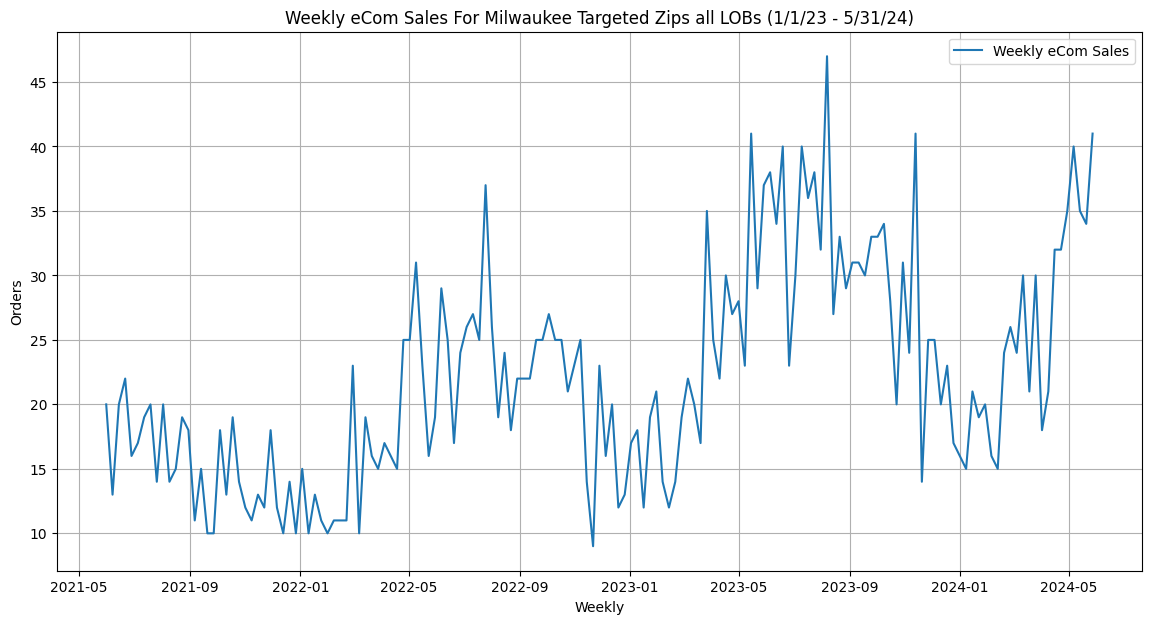

In [ ]:
# plot the current weekly ecom sales data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['IS_ORDER_CONFIRM_IND_SUM'], label='Weekly eCom Sales')
plt.title('Weekly eCom Sales For Milwaukee Targeted Zips all LOBs (1/1/23 - 5/31/24)')
plt.xlabel('Weekly')
plt.ylabel('Orders')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# summary of the data to spot any missing values or anomalies
df.describe(), df.isna().sum()

(       QUALITY_TRAFC_TRO_IND_SUM  QUALITY_TRAFC_OMR_IND_SUM  \
 count                 157.000000                 157.000000   
 mean                    7.961783                  10.840764   
 std                     5.567632                   4.449877   
 min                     0.000000                   1.000000   
 25%                     3.000000                   8.000000   
 50%                     7.000000                  11.000000   
 75%                    11.000000                  14.000000   
 max                    24.000000                  24.000000   
 
        QUALITY_TRAFC_SMB_IND_SUM  IS_ORDER_CONFIRM_IND_SUM  
 count                 157.000000                157.000000  
 mean                    3.324841                 22.108280  
 std                     2.069983                  8.384647  
 min                     0.000000                  9.000000  
 25%                     2.000000                 15.000000  
 50%                     3.000000                 

In [ ]:
df.tail(16)

,QUALITY_TRAFC_TRO_IND_SUM,QUALITY_TRAFC_OMR_IND_SUM,QUALITY_TRAFC_SMB_IND_SUM,IS_ORDER_CONFIRM_IND_SUM
VISIT_START_WEEK,,,,
2024-02-12,4,8,3,15
2024-02-19,4,16,4,24
2024-02-26,10,10,6,26
2024-03-04,3,17,4,24
2024-03-11,19,9,3,30
2024-03-18,6,15,0,21
2024-03-25,10,17,3,30
2024-04-01,11,6,2,18
2024-04-08,11,6,4,21


#Split Training and Test

In [ ]:
# Split the data into training and test sets
train = df.loc[:'2024-02-12']
test = df.loc['2024-02-19':'2024-05-27']

In [ ]:
# Verifing the splits by checking the start and end dates of each dataset
train_start, train_end = train.index.min(), train.index.max()
test_start, test_end = test.index.min(), test.index.max()

train_start, train_end, test_start, test_end

(Timestamp('2021-05-31 00:00:00'),
 Timestamp('2024-02-12 00:00:00'),
 Timestamp('2024-02-19 00:00:00'),
 Timestamp('2024-05-27 00:00:00'))

In [ ]:
# Ensure 'IS_ORDER_CONFIRM_IND_SUM' column is used
train_series = train['IS_ORDER_CONFIRM_IND_SUM']
test_series = test['IS_ORDER_CONFIRM_IND_SUM']

#ARIMA

###Grid Search and tuning for ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import itertools

In [ ]:
# Define the range of p, d, q values to search
p = range(0, 3)
d = range(0, 3)
q = range(0, 3)

In [ ]:
# Generate all different combinations of p, d, q
pdq = list(itertools.product(p, d, q))

# Initialize a list to store the results
results = []

In [ ]:
# Grid search
for param in pdq:
    try:
        model = ARIMA(train_series, order=param)
        model_fit = model.fit()
        aic = model_fit.aic
        bic = model_fit.bic
        results.append((param, aic, bic))
    except Exception as e:
        print(f"Error with parameters {param}: {e}")
        continue

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  

In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Parameters', 'AIC', 'BIC'])

# Sort by AIC
results_df = results_df.sort_values(by='AIC')

In [ ]:
# The best parameters based on AIC
results_df.head()

,Parameters,AIC,BIC
14,"(1, 1, 2)",871.628029,883.423069
23,"(2, 1, 2)",873.392784,888.136583
20,"(2, 0, 2)",874.555674,892.290636
8,"(0, 2, 2)",875.176996,884.001923
5,"(0, 1, 2)",876.128575,884.974854


###Fit ARIMA model and evaluate

In [ ]:
# Fit the ARIMA model
best_params = results_df.iloc[0]['Parameters']
model = ARIMA(train_series, order=best_params)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [ ]:
# Make predictions
predictions = model_fit.predict(start=test_series.index[0], end=test_series.index[-1], dynamic=False)

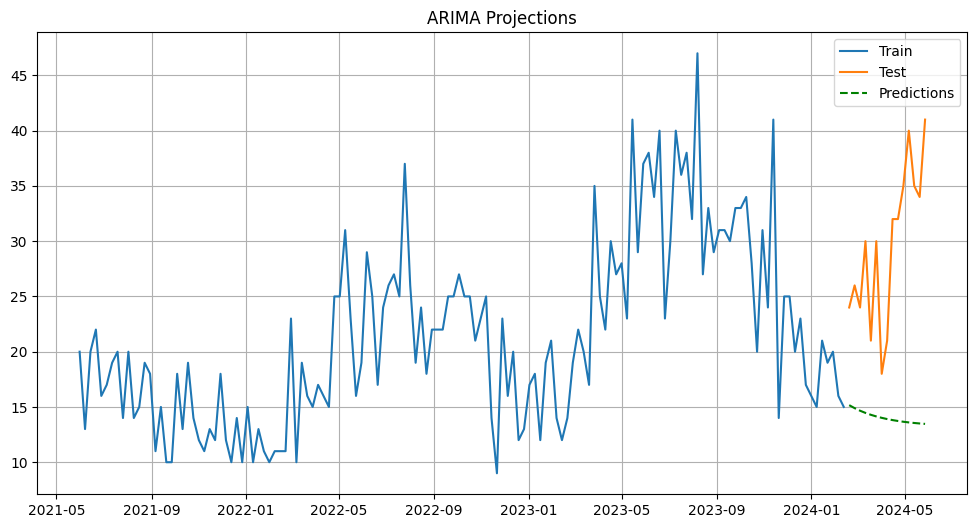

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.title('ARIMA Projections')
plt.plot(train_series.index, train_series, label='Train')
plt.plot(test_series.index, test_series, label='Test')
plt.plot(predictions.index, predictions, label='Predictions', color='green', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate the model's performance
mse = mean_squared_error(test_series, predictions)
mae = mean_absolute_error(test_series, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 289.8369572688356
Mean Absolute Error: 15.47559894987891


Confirmation that ARIMA is not set up to handle seasonality.

#SARIMA

###Grid Search and Tuning for SARIMA

**SARIMA - Grid Search for hyperparameters**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Define the range of p, d, q, P, D, Q values to search
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = 52  # Seasonal cycle length for weekly data with yearly seasonality

In [ ]:
# Generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s) for x in itertools.product(P, D, Q)]

In [ ]:
# Initialize a list to store the results
results = []

Grid search took forever for SARIMA, try to use an auto_arima

In [ ]:
# Grid search
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(train_series,
                            order=param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            model_fit = model.fit(disp=False)
            aic = model_fit.aic
            results.append((param, param_seasonal, aic))
        except Exception as e:
            continue

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All para

In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Parameters', 'Seasonal Parameters', 'AIC'])

# Sort by AIC
results_df = results_df.sort_values(by='AIC')

In [ ]:
results_df.head()

,Parameters,Seasonal Parameters,AIC
59,"(1, 1, 1)","(0, 1, 1, 52)",235.945080
27,"(0, 1, 1)","(0, 1, 1, 52)",236.914424
63,"(1, 1, 1)","(1, 1, 1, 52)",238.160836
31,"(0, 1, 1)","(1, 1, 1, 52)",238.671247
43,"(1, 0, 1)","(0, 1, 1, 52)",242.136804


###Fit SARIMA Model and evaluate

In [ ]:
# Fit the SARIMA model with the best parameters
best_params = results_df.iloc[0]['Parameters']
best_seasonal_params = results_df.iloc[0]['Seasonal Parameters']
model = SARIMAX(train_series,
                order=best_params,
                seasonal_order=best_seasonal_params,
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
# Make predictions
predictions = model_fit.predict(start=test_series.index[0], end=test_series.index[-1], dynamic=False)

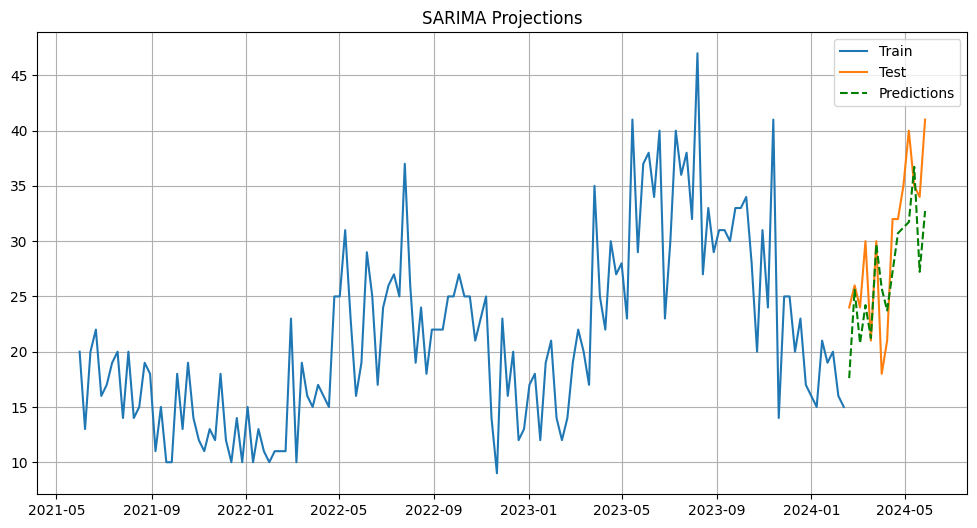

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.title('SARIMA Projections')
plt.plot(train_series.index, train_series, label='Train')
plt.plot(test_series.index, test_series, label='Test')
plt.plot(predictions.index, predictions, label='Predictions', color='green', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate the model's performance
mse = mean_squared_error(test_series, predictions)
mae = mean_absolute_error(test_series, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 25.111714520280387
Mean Absolute Error: 4.109173054980937


###Predictions with the SARIMA Model

Predictins within train period

In [ ]:
# Make in-sample predictions (for the training period)
in_sample_predictions = model_fit.predict(start=train_series.index[0], end=train_series.index[-1], dynamic=False)

Predictions within test period

In [ ]:
# Make out-of-sample predictions (for the test period)
out_of_sample_predictions = model_fit.predict(start=test_series.index[0], end=test_series.index[-1], dynamic=False)

Predict future test periods

In [ ]:
# Forecast future values beyond the test period
forecast_steps = 20  # Number of steps to forecast into the future
future_forecast = model_fit.forecast(steps=forecast_steps)

Combine predictions and actual values in a df

In [ ]:
# Combine predictions and actual values into a single DataFrame for easy comparison
combined_dates = train_series.index.append(test_series.index)
combined_actual = pd.concat([train_series, test_series])
combined_in_sample_predictions = np.append(in_sample_predictions, [np.nan] * len(test_series))
combined_out_of_sample_predictions = np.append([np.nan] * len(train_series), out_of_sample_predictions)

combined_df = pd.DataFrame({
    'Date': combined_dates,
    'Actual': combined_actual,
    'In-sample Predictions': combined_in_sample_predictions,
    'Out-of-sample Predictions': combined_out_of_sample_predictions
})

In [ ]:
# Display the combined DataFrame
combined_df.tail(10)

,Date,Actual,In-sample Predictions,Out-of-sample Predictions
VISIT_START_WEEK,,,,
2024-03-25,2024-03-25,30,NaN,29.724205
2024-04-01,2024-04-01,18,NaN,25.725817
2024-04-08,2024-04-08,21,NaN,23.725349
2024-04-15,2024-04-15,32,NaN,27.225471
2024-04-22,2024-04-22,32,NaN,30.725411
2024-04-29,2024-04-29,35,NaN,31.225437
2024-05-06,2024-05-06,40,NaN,31.725469
2024-05-13,2024-05-13,35,NaN,36.725360
2024-05-20,2024-05-20,34,NaN,27.225432


In [ ]:
# Display the future forecast
future_forecast_df = pd.DataFrame({
    'Date': pd.date_range(start=test_series.index[-1] + pd.Timedelta(weeks=1), periods=forecast_steps, freq='W'),
    'Forecast': future_forecast
})
future_forecast_df.tail(10)

,Date,Forecast
2024-04-29,2024-08-18,31.225437
2024-05-06,2024-08-25,31.725469
2024-05-13,2024-09-01,36.725360
2024-05-20,2024-09-08,27.225432
2024-05-27,2024-09-15,32.725548
2024-06-03,2024-09-22,35.990929
2024-06-10,2024-09-29,35.052543
2024-06-17,2024-10-06,35.242001
2024-06-24,2024-10-13,29.849382
2024-07-01,2024-10-20,33.201269


###Cumulative Effect Over Time

In [ ]:
# Calculate cumulative sum of actual orders and predicted orders
cumulative_actual = test_series.cumsum()
cumulative_predictions = predictions.cumsum()

In [ ]:
# Convert to cumulative percentage
cumulative_actual_pct = (cumulative_actual / cumulative_actual.iloc[-1]) * 100
cumulative_predictions_pct = (cumulative_predictions / cumulative_predictions.iloc[-1]) * 100

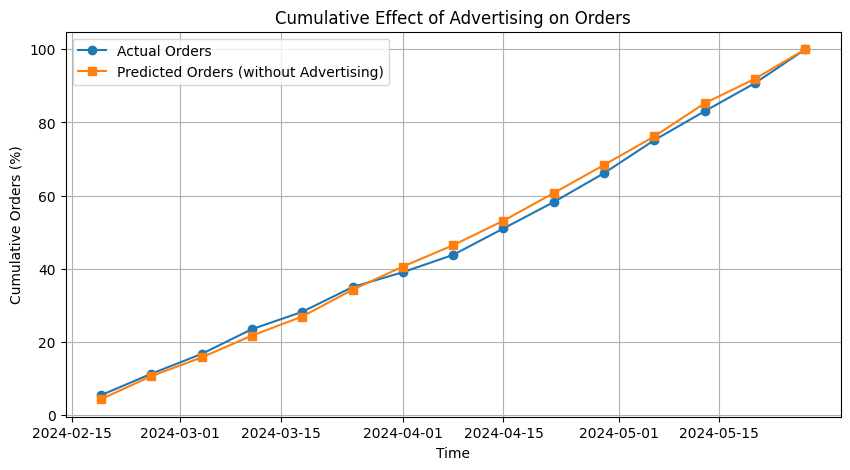

In [ ]:
# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(cumulative_actual_pct, marker='o', linestyle='-', label='Actual Orders')
plt.plot(cumulative_predictions_pct, marker='s', linestyle='-', label='Predicted Orders (without Advertising)')
plt.xlabel('Time')
plt.ylabel('Cumulative Orders (%)')
plt.title('Cumulative Effect of Advertising on Orders')
plt.legend()
plt.grid(True)
plt.show()

# Bonus, Hold Winters Exponential Smoothing

**Use the training set to build an Exponential Smoothing model for the weekly eCom orders.**

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Build and fit the Holt-Winters model
model = ExponentialSmoothing(train['IS_ORDER_CONFIRM_IND_SUM'], trend='add', seasonal='add', seasonal_periods=52).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


**Make Predictions with the model**

In [ ]:
# Predict on the training set to visualize how well the model fits the data
train_predictions = model.fittedvalues

# Predict on the test set
test_predictions = model.forecast(steps=len(test))

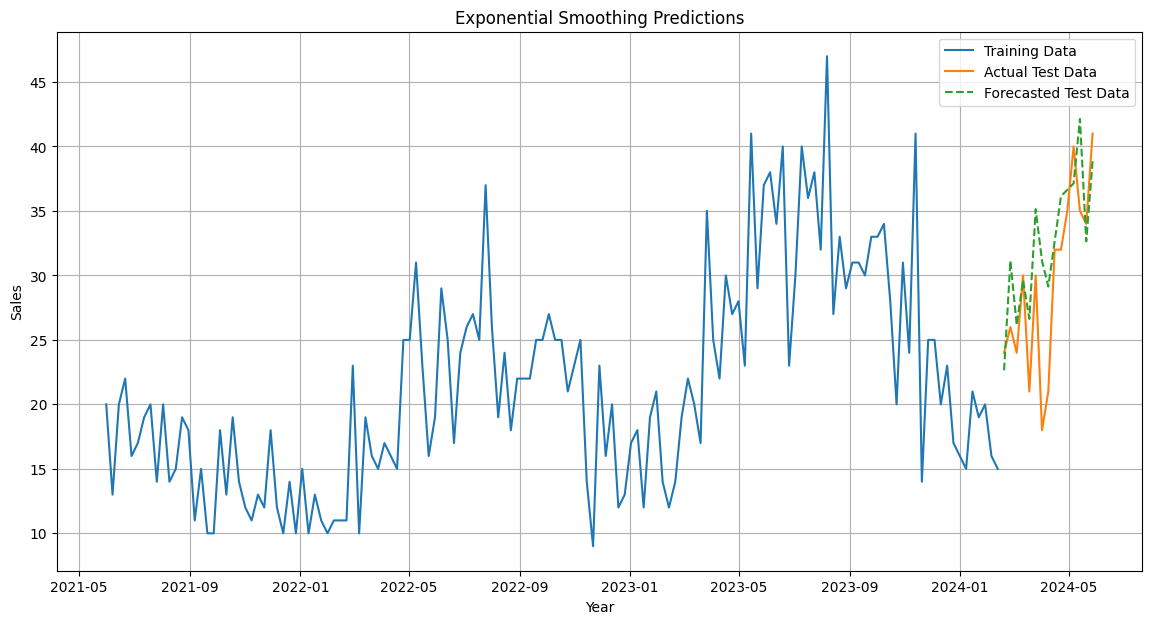

In [ ]:
# Plot the training data, test data, and forecasts
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['IS_ORDER_CONFIRM_IND_SUM'], label='Training Data')
plt.plot(test.index, test['IS_ORDER_CONFIRM_IND_SUM'], label='Actual Test Data')
plt.plot(test.index, test_predictions, label='Forecasted Test Data', linestyle='--')
plt.title('Exponential Smoothing Predictions')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate MAE and MSE for the test set
mae_test = mean_absolute_error(test['IS_ORDER_CONFIRM_IND_SUM'], test_predictions)
mse_test = mean_squared_error(test['IS_ORDER_CONFIRM_IND_SUM'], test_predictions)
print(f'Test MAE: {mae_test}')
print(f'Test MSE: {mse_test}')

Test MAE: 4.064613975269113
Test MSE: 27.71954350482581


Cannot use, exponential smoothing looks to over estimate the forecast a bit.

#Final Result

**Will use SARIMA model**